In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city = city.replace(" ", "%20")
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

## Perform API Calls

In [24]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting UR# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1
for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        record += 1
    except:
        print("City not found, guess try another")
    continue




Processing Record 1 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=kodiak
Processing Record 2 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=tiznit
Processing Record 3 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=walvis%20bay
Processing Record 4 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=pangnirtung
Processing Record 5 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=puerto%20ayora
City not found, guess try another
Processing Record 6 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e88ecf8725422f40c458cfcd21732098&q=mar%20del%20plata
Processing Record 7 | Atuona
http://api.openweathermap.org/data/2.5/weather?unit

Creating Dictionary with Lists

In [22]:
city_data = {
    
    "city_name": city_name, 
    "cloudiness": cloudiness, 
    "country": country, 
    "date": date, 
    "humidity": humidity,
    "lat": lat, 
    "lng": lng,
    "max_temp": max_temp, 
    "wind_speed": wind_speed}
        
        
df = pd.DataFrame(city_data)
df.count()

city_name     571
cloudiness    571
country       571
date          571
humidity      571
lat           571
lng           571
max_temp      571
wind_speed    571
dtype: int64

In [25]:
#Save to CSV
df.to_csv('weather.csv')
df.head(5)

,city_name,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Kodiak,1,US,1535201580,100,39.95,-94.76,71.06,3.38
1,Tiznit,0,MA,1535202702,85,29.70,-9.73,78.41,3.71
2,Walvis Bay,36,NA,1535202702,100,-22.95,14.51,56.81,13.78
3,Pangnirtung,12,CA,1535202635,90,66.15,-65.72,41.60,10.20
4,Puerto Ayora,75,EC,1535198400,77,-0.74,-90.35,69.80,18.34


<function matplotlib.pyplot.show(*args, **kw)>

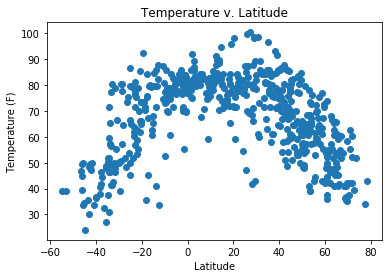

In [28]:
#Graph: Temperature (F) vs. Latitude

plt.scatter(df["lat"], df["max_temp"])
plt.title("Temperature v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("temperature v. latitude.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

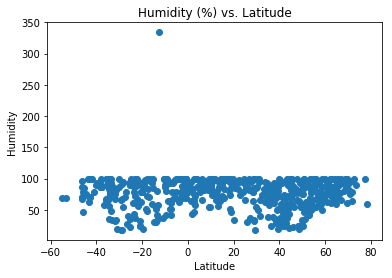

In [32]:
# Graph: Humidity (%) vs. Latitude
plt.scatter(df["lat"], df["humidity"])
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity v. Latitude.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

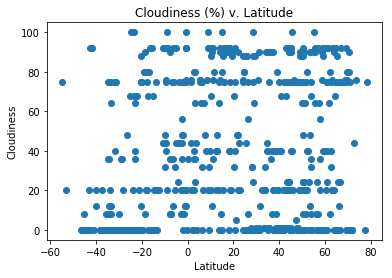

In [34]:
#Cloudiness (%) vs. Latitude
plt.scatter(df["lat"], df["cloudiness"])
plt.title("Cloudiness (%) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness v. Latitude.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

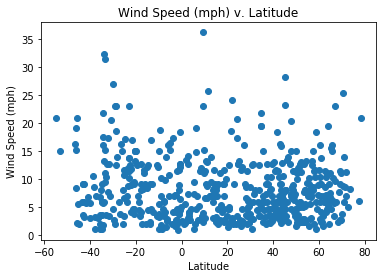

In [35]:
#Wind Speed (mph) vs. Latitude
plt.scatter(df["lat"], df["wind_speed"])
plt.title("Wind Speed (mph) v. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Wind Speed (mph) v. Latitude.png")
plt.show

In [ ]:
#Observations:

#1: Wind speed is focused in areas with latitude in the range of 40 and 60. 
#2: Cloudiness and latitude seem to be evenly dispersed, with the majority of the grouping happening at 0, or the equator. 
#3: The data for the teperature and latitue is curved based upon the curvature of the earth. The highest being at the equator